![Pandas Logo](http://pandas.pydata.org/_static/pandas_logo.png)

# <span style="color:blue">Week 08 - Introduction to Pandas </span>

## <span style="color:red">Today's Agenda </span>
- Pandas: Introduction
    - Series
    - DataFrames
    - Indexing, Selecting, Filtering
    - Drop columns
    - Handling missing Data
    

In [1]:
# Importing modules
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context("notebook")

# Series
A _Series_ is a one-dimensional array-like object containing an array of data and an associated array of __data labels__.
One can use any NumPy data type to assign to the _Series_

Creating a Series:

In [2]:
series_1 = pd.Series(np.random.random(10))
series_1

0    0.746534
1    0.921092
2    0.706502
3    0.237317
4    0.167151
5    0.837645
6    0.550416
7    0.117424
8    0.655950
9    0.408263
dtype: float64

One can get a NumPy array from the Series, by typing:

In [3]:
series_1.values

array([ 0.74653444,  0.92109235,  0.70650184,  0.23731732,  0.16715077,
        0.83764482,  0.55041596,  0.11742395,  0.65595028,  0.40826346])

# Reindexing

One can also get the indices of each element, by typing:

In [4]:
series_1.index.values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

One can also have a custom set of indices:

In [5]:
import string
alphabet = string.lowercase
alphabet = np.array([x for x in alphabet])[0:10]
alphabet

array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], 
      dtype='|S1')

In [6]:
series_2 = pd.Series(np.random.random(len(alphabet)), index=alphabet)
series_2

a    0.845875
b    0.142329
c    0.337683
d    0.063682
e    0.575187
f    0.973920
g    0.502718
h    0.496463
i    0.734602
j    0.019638
dtype: float64

One can select only a subsample of the _Series_

In [7]:
series_1[[1,3,4]]

1    0.921092
3    0.237317
4    0.167151
dtype: float64

In [8]:
series_2[['a','d','h']]

a    0.845875
d    0.063682
h    0.496463
dtype: float64

# Arithmetic and function Mapping

You can also perform numerical expressions

In [9]:
series_1[1]**2

0.84841111721463347

Or find values greater than some value '__x__'

In [10]:
x = 0.5
series_1[series_1 >= x]

0    0.746534
1    0.921092
2    0.706502
5    0.837645
6    0.550416
8    0.655950
dtype: float64

You can apply functions to a column, and save it as a _new_ Series

In [11]:
import sys
def exponentials(arr, basis=10.):
    """
    Uses the array `arr` as the exponents for `basis`
    
    Parameters
    ----------
    arr: numpy array, list, pandas Series; shape (N,)
        array to be used as exponents of `basis`
    
    power: int or float, optional (default = 10)
        number used as the basis
    
    Returns
    -------
    exp_arr: numpy array or list, shape (N,)
        array of values for `basis`**`arr`
    """
    if isinstance(arr, list):
        exp_arr = [basis**x for x in arr]
        return exp_arr        
    elif isinstance(arr, np.ndarray) or isinstance(arr, pd.core.series.Series):
        exp_arr = basis**arr
        return exp_arr
    else:
        cmd = ">>>> `arr` is not a list nor a numpy array"
        cmd +="\n>>>> Please give the correct type of object"
        print(cmd)
        sys.exit(1)

In [12]:
exponentials(series_1[series_1 >= x])

0    5.578718
1    8.338585
2    5.087470
5    6.880893
6    3.551534
8    4.528457
dtype: float64

You can also __create__ a _Series_ using a _dictionary_ (we talked about these on __Week 4__)

In [13]:
labels_arr = ['foo', 'bar', 'baz']
data_arr   = [100, 200, 300]
dict_1     = dict(zip(labels_arr, data_arr))
dict_1

{'bar': 200, 'baz': 300, 'foo': 100}

In [14]:
series_3 = pd.Series(dict_1)
series_3

bar    200
baz    300
foo    100
dtype: int64

# Handling Missing Data

One of the most useful features of pandas is that it __can handle missing data__ quite easily:

In [15]:
index = ['foo', 'bar', 'baz', 'qux']
series_4 = pd.Series(dict_1, index=index)
series_4

foo    100.0
bar    200.0
baz    300.0
qux      NaN
dtype: float64

In [16]:
pd.isnull(series_4)

foo    False
bar    False
baz    False
qux     True
dtype: bool

In [17]:
series_3 + series_4

bar    400.0
baz    600.0
foo    200.0
qux      NaN
dtype: float64

So using a Series is powerful, but __DataFrames__ are probably what gets used the most since it represents a _tabular data structure_ containing an ordered collection of __columns__ and __rows__.

# DataFrames

A DataFrame is a "tabular data structure" containing an _ordered collection of columns_. Each column can a have a __different__ data type.

Row and column operations are treated roughly symmetrically.
One can obtain a DataFrame from a normal dictionary, or by reading a file with columns and rows.

Creating a DataFrame

In [18]:
data_1 = {'state' : ['VA', 'VA', 'VA', 'MD', 'MD'],
          'year' : [2012, 2013, 2014, 2014, 2015],
          'popu' : [5.0, 5.1, 5.2, 4.0, 4.1]}
df_1 = pd.DataFrame(data_1)
df_1

,popu,state,year
0,5.0,VA,2012
1,5.1,VA,2013
2,5.2,VA,2014
3,4.0,MD,2014
4,4.1,MD,2015


This DataFrame has 4 rows and 3 columns by the name "_pop_", "_state_", and "_year_".

The way to __access__ a DataFrame is quite similar to that of accessing a _Series_.<br>
To access a __column__, one writes the name of the `column`, as in the following example:

In [19]:
df_1['popu']

0    5.0
1    5.1
2    5.2
3    4.0
4    4.1
Name: popu, dtype: float64

In [20]:
df_1.popu

0    5.0
1    5.1
2    5.2
3    4.0
4    4.1
Name: popu, dtype: float64

One can also handle __missing data__ with DataFrames.
Like Series, columns that are not present in the data are NaNs:

In [21]:
df_2 = pd.DataFrame(data_1, columns=['year', 'state', 'popu', 'unempl'])
df_2

,year,state,popu,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,NaN
3,2014,MD,4.0,NaN
4,2015,MD,4.1,NaN


In [22]:
df_2['state']

0    VA
1    VA
2    VA
3    MD
4    MD
Name: state, dtype: object

One can __retrieve a row__ by:

In [23]:
df_2.ix[1]

year      2013
state       VA
popu       5.1
unempl     NaN
Name: 1, dtype: object

Editing a DataFrame is quite easy to do. One can _assign_ a Series to a column of the DataFrame. If the Series is a list or an array, __the length must match the DataFrame__.

In [24]:
unempl = pd.Series([1.0, 2.0, 10.], index=[1,3,5])
unempl

1     1.0
3     2.0
5    10.0
dtype: float64

In [25]:
df_2['unempl'] = unempl
df_2

,year,state,popu,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,1.0
2,2014,VA,5.2,NaN
3,2014,MD,4.0,2.0
4,2015,MD,4.1,NaN


In [26]:
df_2.unempl.isnull()

0     True
1    False
2     True
3    False
4     True
Name: unempl, dtype: bool

You can also __transpose__ a DataFrame, i.e. switch rows by columns, and columns by rows

In [27]:
df_2.T

,0,1,2,3,4
year,2012,2013,2014,2014,2015
state,VA,VA,VA,MD,MD
popu,5,5.1,5.2,4,4.1
unempl,NaN,1,NaN,2,NaN


Now, let's say you want to show __only the 'year' and 'popu' columns__.
You can do it by:

In [28]:
df_2[['year', 'popu']]

,year,popu
0,2012,5.0
1,2013,5.1
2,2014,5.2
3,2014,4.0
4,2015,4.1


# Dropping Entries

Let's say you only need a subsample of the table that you have, and you need to __drop__ a column from the DataFrame.
You can do that by using the '_drop_' option:

In [29]:
df_2

,year,state,popu,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,1.0
2,2014,VA,5.2,NaN
3,2014,MD,4.0,2.0
4,2015,MD,4.1,NaN


In [30]:
df_3 = df_2.drop('unempl', axis=1)
df_3

,year,state,popu
0,2012,VA,5.0
1,2013,VA,5.1
2,2014,VA,5.2
3,2014,MD,4.0
4,2015,MD,4.1


You can also __drop certain rows__:

In [31]:
df_4 = df_2.drop([1,4])
df_4

,year,state,popu,unempl
0,2012,VA,5.0,NaN
2,2014,VA,5.2,NaN
3,2014,MD,4.0,2.0


__Look at this carefully__! The DataFrame _kept_ preserved the same indices as for __df_2__.

If you can to __reset__ the indices, you can do that by:

In [32]:
df_4.reset_index(inplace=True)
df_4

,index,year,state,popu,unempl
0,0,2012,VA,5.0,NaN
1,2,2014,VA,5.2,NaN
2,3,2014,MD,4.0,2.0


# Gaia Dataset 
![Gaia](http://pbs.twimg.com/profile_images/1266601315/gaiaLogo_reasonably_small.png)

Pandas is great at reading Data tables and CSV files, and other kinds of documents.
For the remainder of this notebook, we will be using the [Gaia](https://www.cosmos.esa.int/web/gaia)'s DR1 catalogue.

In [33]:
gaia_df = pd.read_csv('http://1016243957.rsc.cdn77.org/Gaia/gaia_source/csv/GaiaSource_000-000-000.csv.gz', compression='gzip')

In [34]:
gaia_df

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,scan_direction_mean_k4,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_variable_flag,l,b,ecl_lon,ecl_lat
0,1635378410781933568,65408,973786105,2015.0,44.996152,14.379929,0.005616,6.517028,NaN,NaN,...,25.226347,30,1567.255110,5.856073,17.536921,NOT_AVAILABLE,176.951072,-48.901522,42.533723,-16.329572
1,1635378410781933568,34359896320,1010840134,2015.0,45.004970,0.156231,0.019875,0.528851,NaN,NaN,...,28.650621,68,40086.238958,27.159845,14.017282,NOT_AVAILABLE,176.944759,-48.885280,42.546862,-16.318524
2,1635378410781933568,34361129088,388985243,2015.0,45.004312,0.347814,0.021042,1.100095,NaN,NaN,...,28.207079,52,1761.880082,19.831304,17.409829,NOT_AVAILABLE,176.942786,-48.884943,42.546563,-16.317215
3,1635378410781933568,309238066432,590730619,2015.0,44.995037,2.168152,0.038152,1.215309,NaN,NaN,...,25.310766,61,275.451290,2.733062,19.424658,NOT_AVAILABLE,176.914265,-48.879747,42.542548,-16.298139
4,1635378410781933568,343597448960,329156827,2015.0,44.963892,11.881098,0.043596,5.411748,NaN,NaN,...,27.213010,53,1025.723310,10.073989,17.997195,NOT_AVAILABLE,176.875418,-48.898381,42.513189,-16.283803
5,1635378410781933568,515396233856,260581828,2015.0,44.998326,1.953613,0.066335,1.112199,NaN,NaN,...,24.463037,52,292.297111,2.363495,19.360209,NOT_AVAILABLE,176.886900,-48.857814,42.554428,-16.272157
6,1635378410781933568,549755818112,278964178,2015.0,45.048282,0.143346,0.048259,0.150784,NaN,NaN,...,27.246462,77,18064.661353,18.664497,14.882696,NOT_AVAILABLE,176.959360,-48.834394,42.598674,-16.304073
7,1635378410781933568,824633879296,201645987,2015.0,45.023616,7.686524,0.068421,14.300411,NaN,NaN,...,27.421402,40,4228.838911,8.266022,16.459217,NOT_AVAILABLE,176.911300,-48.838164,42.580255,-16.277571
8,1635378410781933568,927713095040,1018609930,2015.0,45.026727,18.851057,0.081702,46.240572,NaN,NaN,...,27.308582,35,327.815930,4.918327,19.235695,NOT_AVAILABLE,176.900059,-48.826705,42.587406,-16.265784
9,1635378410781933568,1099511693312,442633663,2015.0,44.966545,1.672164,0.046310,0.932317,NaN,NaN,...,25.379011,59,356.809033,2.622480,19.143680,NOT_AVAILABLE,176.875251,-48.894588,42.516660,-16.281987


### Shape, Columns and Rows

You can get the shape of the "gaia_df" DataFrame by typing: 

In [35]:
gaia_df.shape

(218453, 57)

That means there are __218453 rows__ and __57 columns__.

To get an array of the columns available, one could write:

In [36]:
gaia_df.columns.values.sort()
gaia_df.columns.values

array(['astrometric_delta_q', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_n_bad_obs_ac',
       'astrometric_n_bad_obs_al', 'astrometric_n_good_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_obs_al', 'astrometric_primary_flag',
       'astrometric_priors_used', 'astrometric_relegation_factor',
       'astrometric_weight_ac', 'astrometric_weight_al', 'b', 'dec',
       'dec_error', 'dec_parallax_corr', 'dec_pmdec_corr', 'dec_pmra_corr',
       'duplicated_source', 'ecl_lat', 'ecl_lon', 'l',
       'matched_observations', 'parallax', 'parallax_error',
       'parallax_pmdec_corr', 'parallax_pmra_corr', 'phot_g_mean_flux',
       'phot_g_mean_flux_error', 'phot_g_mean_mag', 'phot_g_n_obs',
       'phot_variable_flag', 'pmdec', 'pmdec_error', 'pmra', 'pmra_error',
       'pmra_pmdec_corr', 'ra', 'ra_dec_corr', 'ra_error',
       'ra_parallax_corr', 'ra_pmdec_corr', 'ra_pmra_corr', 'random_index',
       'ref_ep

Let's say you only want a DataFrame with the the colums:
- ra (right ascension)
- dec (declination)
- l (galactic longitude)
- b (galactic latitude)

You do this by using the __loc__ option for the DataFrame:

In [37]:
gaia_df_2 = gaia_df.loc[:,['ra','dec','l','b']]
gaia_df_2

,ra,dec,l,b
0,44.996152,0.005616,176.951072,-48.901522
1,45.004970,0.019875,176.944759,-48.885280
2,45.004312,0.021042,176.942786,-48.884943
3,44.995037,0.038152,176.914265,-48.879747
4,44.963892,0.043596,176.875418,-48.898381
5,44.998326,0.066335,176.886900,-48.857814
6,45.048282,0.048259,176.959360,-48.834394
7,45.023616,0.068421,176.911300,-48.838164
8,45.026727,0.081702,176.900059,-48.826705
9,44.966545,0.046310,176.875251,-48.894588


This selects all of the rows, and only the selected columns in the list.

You can also select only a subsample of the rows as well, as in the following example.
Let's say I just want a random subsample of __10%__ of the galaxies in the Gaia DR1 catalogue. I can do that by:

In [38]:
# Defining indices to select from the DataFrame
import random
nrows = len(gaia_df_2)
random_idx = random.sample(np.arange(nrows), int(0.01*nrows))
random_idx = np.sort(random_idx)

In [39]:
gaia_df_3 = gaia_df_2.loc[random_idx,:]
gaia_df_3

,ra,dec,l,b
14,44.952650,0.084952,176.818303,-48.877735
228,44.795829,0.184017,176.544033,-48.921306
232,44.865366,0.191660,176.609452,-48.866135
442,44.855181,0.433960,176.335425,-48.704228
665,45.446312,0.631135,176.743966,-48.143173
690,45.482151,0.686472,176.721784,-48.078930
789,45.067868,0.614153,176.365601,-48.426195
1149,44.715455,0.599169,176.008540,-48.688023
1352,44.737282,0.753932,175.865316,-48.563660
1493,44.859724,0.726785,176.024473,-48.495707


I'm __re-normalizing__ the indices of this DataFrame

In [40]:
gaia_df_3.reset_index(inplace=True, drop=True)
gaia_df_3

,ra,dec,l,b
0,44.952650,0.084952,176.818303,-48.877735
1,44.795829,0.184017,176.544033,-48.921306
2,44.865366,0.191660,176.609452,-48.866135
3,44.855181,0.433960,176.335425,-48.704228
4,45.446312,0.631135,176.743966,-48.143173
5,45.482151,0.686472,176.721784,-48.078930
6,45.067868,0.614153,176.365601,-48.426195
7,44.715455,0.599169,176.008540,-48.688023
8,44.737282,0.753932,175.865316,-48.563660
9,44.859724,0.726785,176.024473,-48.495707


You can produce __plots__ directly from the DataFrame

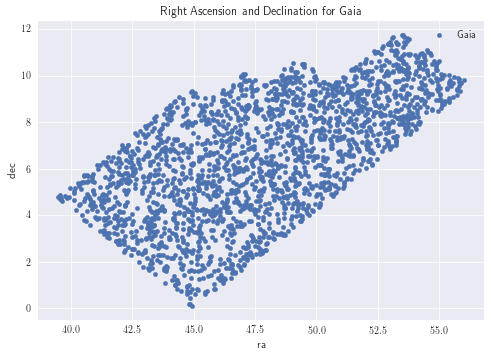

In [41]:
gaia_df_3.plot('ra','dec',kind='scatter', label='Gaia', title='Right Ascension and Declination for Gaia')

Or even __Scatterplot Matrices__:

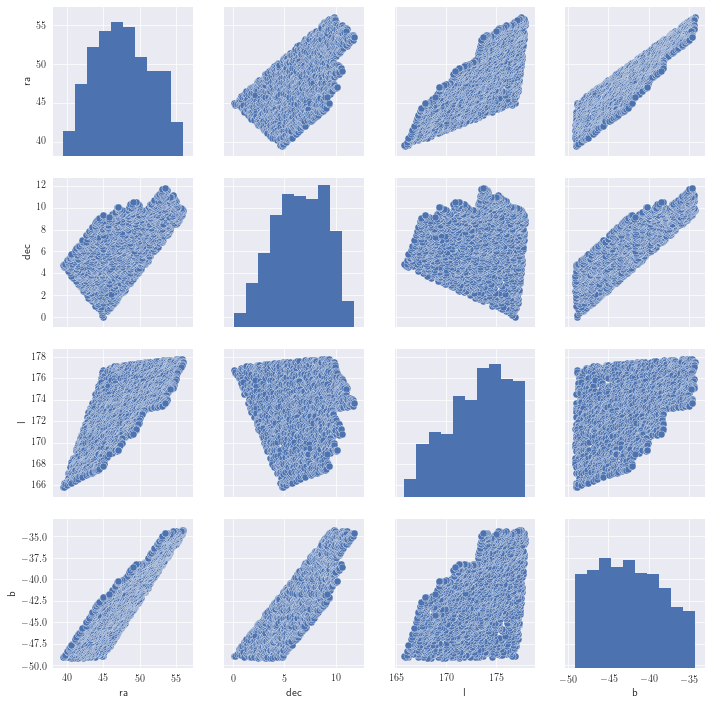

In [42]:
sns.pairplot(gaia_df_3)

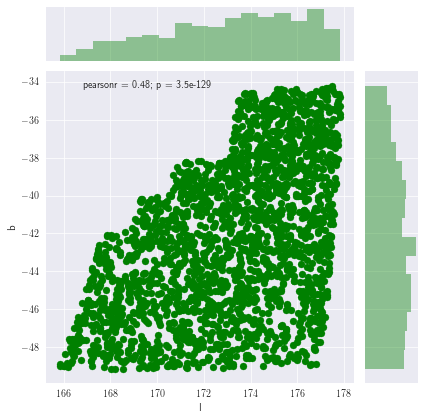

In [43]:
sns.jointplot(gaia_df_3.l, gaia_df_3.b, color='green')

# Indexing, Selecting, Filtering Data

Now I want to filter the data based on __ra__ and __dec__:

I want to select all the stars within:
- 45 < RA < 50
- 5 < Dec < 10

Normally, you would could do in numpy using the __`np.where`__ function, like in the following example:

In [44]:
ra_arr = gaia_df.ra.values
dec_arr = gaia_df.dec.values

In [45]:
# Just showing the first 25 elements
np.column_stack((ra_arr, dec_arr))[0:25]

array([[  4.49961522e+01,   5.61634775e-03],
       [  4.50049701e+01,   1.98746513e-02],
       [  4.50043123e+01,   2.10424715e-02],
       [  4.49950374e+01,   3.81519670e-02],
       [  4.49638922e+01,   4.35964570e-02],
       [  4.49983264e+01,   6.63346354e-02],
       [  4.50482820e+01,   4.82585916e-02],
       [  4.50236165e+01,   6.84211252e-02],
       [  4.50267273e+01,   8.17017400e-02],
       [  4.49665454e+01,   4.63102291e-02],
       [  4.49932711e+01,   7.63359005e-02],
       [  4.49690763e+01,   8.44258917e-02],
       [  4.49784589e+01,   9.25808117e-02],
       [  4.49328009e+01,   6.48117207e-02],
       [  4.49526503e+01,   8.49519208e-02],
       [  4.49511545e+01,   1.05309011e-01],
       [  4.49960582e+01,   8.49218778e-02],
       [  4.50137910e+01,   8.77425966e-02],
       [  4.49830971e+01,   9.64104969e-02],
       [  4.50050386e+01,   1.01940363e-01],
       [  4.50955780e+01,   8.53094013e-02],
       [  4.50813558e+01,   8.17060309e-02],
       [  

In [46]:
## Numpy way of finding the stars that meet the criteria
# RA critera
ra_idx = np.where((ra_arr >= 45) & (ra_arr <= 50))[0]
# Dec criteria
dec_idx = np.where((dec_arr >= 5) & (dec_arr <= 10))[0]
# Finding `intersecting' indices that meet both criteria
radec_idx = np.intersect1d(ra_idx, dec_idx)
# Selecting the values from only those indices
ra_new = ra_arr[radec_idx]
dec_new = dec_arr[radec_idx]
# Printing out ra and dec for corresponding indices
print(np.column_stack((ra_new, dec_new)))

[[ 49.64774675   5.00280731]
 [ 49.63224857   5.0081667 ]
 [ 49.58879967   5.00074408]
 ..., 
 [ 45.85703513   9.13276023]
 [ 45.84518961   9.14328854]
 [ 45.84514856   9.14476464]]


This is rather convoluted and __long__, and one can easily make a mistake if s/he doesn't keep track of which arrays s/he is using!

In Pandas, this is __much easier!!__

In [47]:
gaia_df_4 = gaia_df.loc[(
                (gaia_df.ra >= 45) & (gaia_df.ra <= 50) &
                (gaia_df.dec >= 5) & (gaia_df.dec <= 10))]
gaia_df_4[['ra','dec']]

,astrometric_n_bad_obs_al,astrometric_n_good_obs_al
43777,49.647747,5.002807
43778,49.632249,5.008167
43779,49.588800,5.000744
43780,49.583936,5.015898
43781,49.606410,5.014561
43782,49.626470,5.031774
43784,49.548174,5.000879
43785,49.556817,5.005441
43786,49.545010,5.014518
43787,49.553024,5.020243


# <span style="color:red">Future of Pandas </span>
Pandas is a __great__ for handling data, especially comma-delimited or space-separated data. Pandas is also compatible with many other packages, like __seaborn__, __astropy__, NumPy, etc.

We will have another lecture on Pandas that will cover much more advanced aspects of Pandas. __Make sure you keep checking the schedule!__

# <span style="color:blue">Resources </span>
- [12 Useful Pandas Techniques in Python for Data Manipulation](https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/)
- [Datacamp Pandas Tutorial](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python)
- [Top 8 resources for learning data analysis with pandas](http://www.dataschool.io/best-python-pandas-resources/)